<a href="https://colab.research.google.com/github/sosarodrigox/grupo13_pp2/blob/main/ProyectoIntegrador_Grupo13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Superior Politécnico Córdoba

## Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial

### Cátedra: Práctica Profesionalizante II

**Docente**: Facundo Oliva Cuneo

**Año**: 2024
  
**Trabajo Práctico Integrador**

## Grupo 13
### Integrantes:

- **Ingaramo, Ma. Eugenia**  
  [eugenia.ingaramo@gmail.com](mailto:eugenia.ingaramo@gmail.com)
- **Lonardi, Pablo**  
  [lonardipablo@gmail.com](mailto:lonardipablo@gmail.com)
- **Margheim, Carolina**  
  [caro08.m@gmail.com](mailto:caro08.m@gmail.com)
- **Sosa, Rodrigo**  
  [sosarodrigox@gmail.com](mailto:sosarodrigox@gmail.com)
- **Zenere, Mauricio**  
  [zeneremauricio@gmail.com](mailto:zeneremauricio@gmail.com)

In [1]:
import pandas as pd

# URL del archivo en formato 'Raw' en GitHub
url = "https://raw.githubusercontent.com/sosarodrigox/grupo13_pp2/main/data/data.csv"

# Cargar los datos en un DataFrame
data = pd.read_csv(url)

# Mostrar las primeras filas para confirmar la carga correcta
print(data.head())

          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

In [2]:
# Configurar opciones de visualización
pd.set_option("display.max_columns", None)  # Todas las columnas
pd.set_option("display.max_rows", 10)  # 0 filas

# DataFrame
data

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


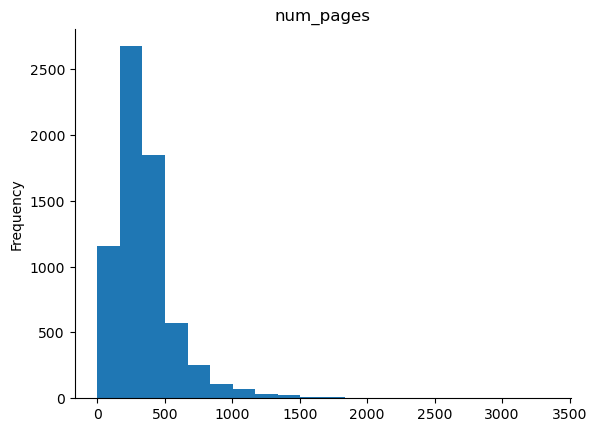

In [3]:
# @title num_pages

from matplotlib import pyplot as plt

data["num_pages"].plot(kind="hist", bins=20, title="num_pages")
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)